[![alt text](https://avatars2.githubusercontent.com/u/60108327?s=400&u=4aaa7e2f7be4d0105bbcc0994e973c469b724237&v=4)](https://github.com/mc-Vvp/DataScienceSem2)

# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.axes_style("whitegrid")
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, binarize
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, average_precision_score  
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# Data

In [12]:
fashion_train = pd.read_csv('dataset/fashion-mnist_train.csv')
fashion_test = pd.read_csv('dataset/fashion-mnist_test.csv')
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* **About:** this dataset contains two csv files, one for train and one for test. the training set has 60000 examples and the testing set has 10000 examples. each example is a 28X28 pixels which means that the image has 784 pixels. <br>
Each training and test example is assigned to one of the ten labels.
* **Labels:** <br>
    * 0 T-shirt/top <br>
    * 1 Trouser <br>
    * 2 Pullover <br>
    * 3 Dress <br>
    * 4 Coat <br>
    * 5 Sandal <br>
    * 6 Shirt <br>
    * 7 Sneaker <br>
    * 8 Bag <br>
    * 9 Ankle boot <br>
 


pca

In [25]:
train_set = np.array(fashion_train, dtype='float32')
test_set = np.array(fashion_test, dtype='float32')

X_train = train_set[:, 1:]
X_test = test_set[:, 1:]

y_train = train_set[:, 0]
y_test = test_set[:, 0]

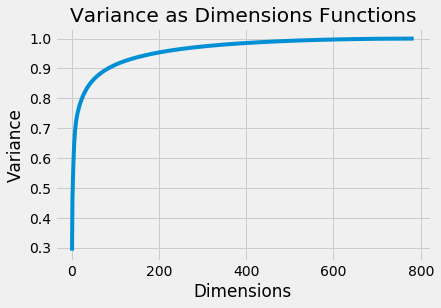

In [55]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, len(cumsum)+1)
plt.plot(x, cumsum)
plt.grid(True)
plt.title('Variance as Dimensions Functions')
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()